In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
t = np.array(range(1850,2020))
y0 = [0,595,0,0,0]
def rhs(y, t,kappa_l,Do,gamma_l,gamma_o,c_amp,alpha,beta_l,beta_o,lamb,rho,rho2,beta_od,kappa2): 
    emis_t = lambda x:x
    T_a,C_a,C_o,C_od,T_o = y
    eq1 = 1/kappa_l*(6.3*np.log(C_a/300)-lamb*T_a-Do*(T_a-T_o))
    eq2 = (emis_t(t)-(gamma_l+gamma_o)*eq1*(1+T_a*c_amp))/(1+alpha*(beta_l))-beta_o*(alpha*C_a-rho*C_o)
    dppm = (alpha*C_a - rho*C_o)/100
    dppm2 = (rho*C_o - rho2*C_od)/100
    eq3 = beta_o * dppm + gamma_o*eq1 - beta_od*dppm2
    eq4 = beta_od * dppm2
    eq5 = 1/kappa2*Do*(T_a - T_o)
    return np.array([eq1,eq2,eq3,eq4,eq5])

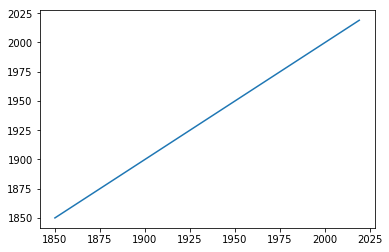

In [13]:
plt.plot(range(1850,2020),range(1850,2020))

In [14]:
mat=1.8e20
alpha=1e6/mat/12*1e15

In [15]:
t = np.array(range(1850,2020))  # the points of evaluation of solution
#r = ode(rhs).set_integrator("dopri5")  # choice of method
y = odeint(rhs,y0,t,args = (9.3*100,0.21,-0.13,-0.2,1,alpha,1.9,1.6,0.9,1,1,0.5,21))

Text(0, 0.5, 'Temperature')

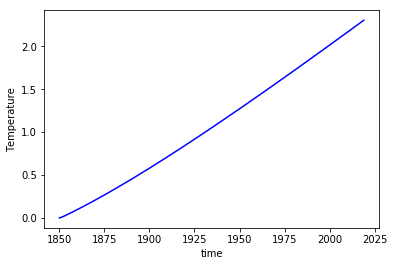

In [16]:
plt.plot(t, y[:, 0], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Temperature')

Text(0, 0.5, 'Carbon')

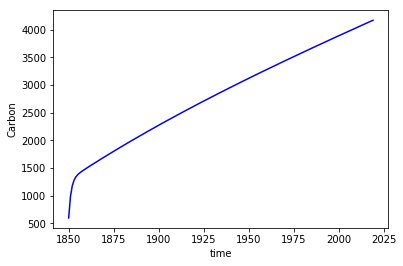

In [17]:
plt.plot(t, y[:, 1], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Carbon')

Text(0, 0.5, 'Carbon of ocean')

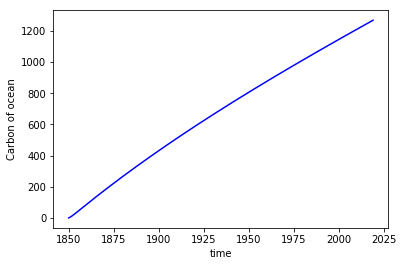

In [22]:
plt.plot(t, y[:, 2], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Carbon of ocean')

Text(0, 0.5, 'Carbon of deep ocean')

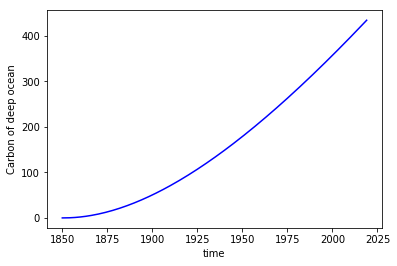

In [23]:
plt.plot(t, y[:, 3], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Carbon of deep ocean')

Text(0, 0.5, 'Temperature')

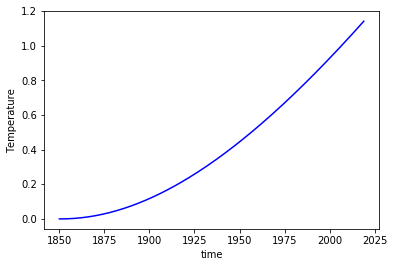

In [20]:
plt.plot(t, y[:, 4], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Temperature')